RC circuit response for chirp signal
=====================================

This post presents next experiment with RC circuit. Response for chirp signal will be simulated and measured. Firstly chirp signal will be described. Then will be presented simulation and experiment.

Chirp is a sinus signal that constantly change its frequency:

$$ u(t) = A \sin \left(  2 \pi \frac{\left( T-t \right) f_0 + t f_1}{T} t \right) $$

where $A$ is amplitued, $T$ - is length of signal, $f_0$ is frequency at time 0, and $f_1$ at time $T$.
It is very useful for determining the Bode characteristic of dynamics system.

In [3]:
import numpy
import scipy
import matplotlib.pyplot as plt
from sympy import init_session
init_session() 
import scipy.signal as sig
import scipy.optimize as opt
from IPython.display import Image
import scipy.signal as sig
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


For experimet RC circuit form last post was used. Firstly transfer function was created:

In [8]:
RC = 0.0085
G = sig.TransferFunction(np.array([1]), np.array([RC, 1]))

Then chirp signal was generated. Sampling frequency was choosen to $1\;kHz$ so maximum generated frequency is $ 500\;Hz$ (Nyquist frequency).

In [46]:
T = 5
Ts = 0.001
f0 = 1
f1 = 500
t=numpy.linspace(0,T,T/Ts+1)
u=sig.chirp(t,f0=f0,t1=T,f1=f1)

STM32 contain 12 bit DAC. So signal must be shifted and scaled to take values beetween 0 and 4095.  Then it will be rounded to integers:

In [41]:
u_int = (u+1)/2*4095
u_int = u_int+0.5
u_int = u_int.astype(int)

In experimental set-up range of output voltage is beetween $0 \; V$ and $3.3 \; V$:

In [42]:
u_v = u_int*3.3/4095.0

Now all data for simulation are prepared. Outcome is presented on belowe chart.
Blue curve is input signal and green output. This plot show how amplitued of output signal is determined by its frequency. It is so called Bode characteristics. RC circuit is a low pass filter.

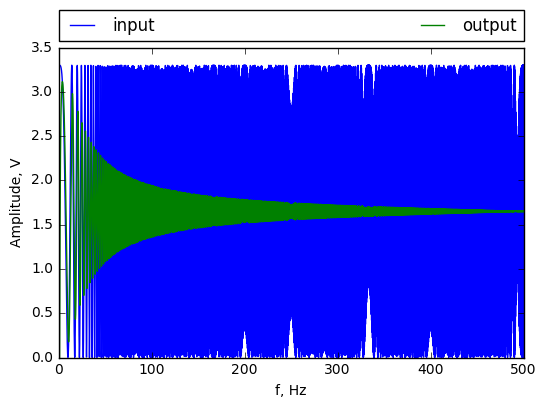

In [50]:
f = numpy.linspace(f0,f1, T/Ts+1)
y=G.output(u_v,T=t)
fig = plt.axes()
input, = fig.plot(f,u_v,label='input')
output, = fig.plot(f,y[1],label='output')
fig.set_xlabel('f, Hz')
fig.set_ylabel('Amplitude, V')
plt.legend(handles=[input, output])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

Now header file with chipr signal will be generated. It will be used in microcontroler to generate testing signal: 

In [60]:
f = open('chirp.h', 'w')
f.write('#ifndef CHIRP_H\n')
f.write('#define CHIRP_H\n')
f.write('const uint16_t chirp_size = ' + repr(np.size(u_int)) + ';\n')
f.write('const uint16_t chirp[] = {\n')
for value in u_int:
    f.write('    ' + repr(value) + ',\n')
f.write('};\n')
f.write('#endif\n')
f.write('\n')
f.close()

STM32F429DISC0 discovery generate signal and measuring response of circuit. Configuration was generated in  STM32CubeMX and code was written in Atolic TrueStudio. Project is avaiable on github.